In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

In [ ]:
# Load alumni data
alumni_df = pd.read_csv("alumni_data.csv")


In [ ]:
# Load student data
student_df = pd.read_csv("student_data.csv")

In [ ]:
alumni_df

,Name,Year of Graduation,Branch,Current Designation,Company,Skills
0,Abhishek Sharma,2015,Computer,Data Scientist,Google,"Machine Learning, Python, Data Analysis"
1,Aditi Singh,2012,Electrical,Senior Engineer,GE Power,"Control Systems, Power Electronics, MATLAB"
2,Akash Gupta,2013,Mechanical,Project Manager,Tata Motors,"Project Management, SolidWorks, AutoCAD"
3,Anjali Kadam,2010,Computer,UX Designer,Microsoft,"User Experience Design, Adobe Creative Suite, ..."
4,Avinash Singh,2008,Electronics,Senior Manager,Intel,"FPGA Design, Verilog, SystemVerilog"
5,Bhavna Shah,2005,Chemical,Senior Scientist,Johnson & Johnson,"Chemical Engineering, Research, Biotechnology"
6,Deepak Gupta,2011,Civil,Project Manager,L&T,"Project Management, AutoCAD, Project Planning"
7,Divya Sharma,2016,Computer,Software Engineer,Amazon,"Java, Spring Boot, AWS, SQL"
8,Gaurav Singh,2009,Electronics,Technical Lead,Qualcomm,"Embedded Systems, C, ARM"
9,Hitesh Patel,2014,Mechanical,Design Engineer,BMW,"CATIA, ANSYS, GD&T"


In [ ]:
student_df.head()

,Name,Email_id,Password,Skills
0,Aarav Sharma,aarav.sharma_42@gmail.com,123456,"Python, SQL, Django, React"
1,Aditi Singh,aditi.singh_97@gmail.com,123456,"JavaScript, HTML, CSS, Node.js"
2,Aditya Gupta,aditya.gupta_27@gmail.com,123456,"Java, Spring Boot, Hibernate, Angular"
3,Aishwarya Patel,aishwarya.patel_58@gmail.com,123456,"PHP, Laravel, Vue.js, MySQL"
4,Akash Mehta,akash.mehta_82@gmail.com,123456,"C++, OpenGL, Unreal Engine, DirectX"


In [ ]:
alumni_df = alumni_df.drop(['Year of Graduation','Branch','Current Designation','Company'], axis = 1)
alumni_df

,Name,Skills
0,Abhishek Sharma,"Machine Learning, Python, Data Analysis"
1,Aditi Singh,"Control Systems, Power Electronics, MATLAB"
2,Akash Gupta,"Project Management, SolidWorks, AutoCAD"
3,Anjali Kadam,"User Experience Design, Adobe Creative Suite, ..."
4,Avinash Singh,"FPGA Design, Verilog, SystemVerilog"
5,Bhavna Shah,"Chemical Engineering, Research, Biotechnology"
6,Deepak Gupta,"Project Management, AutoCAD, Project Planning"
7,Divya Sharma,"Java, Spring Boot, AWS, SQL"
8,Gaurav Singh,"Embedded Systems, C, ARM"
9,Hitesh Patel,"CATIA, ANSYS, GD&T"


In [ ]:
student_df = student_df.drop(['Email_id','Password'], axis = 1)
student_df

,Name,Skills
0,Aarav Sharma,"Python, SQL, Django, React"
1,Aditi Singh,"JavaScript, HTML, CSS, Node.js"
2,Aditya Gupta,"Java, Spring Boot, Hibernate, Angular"
3,Aishwarya Patel,"PHP, Laravel, Vue.js, MySQL"
4,Akash Mehta,"C++, OpenGL, Unreal Engine, DirectX"
...,...,...
95,Sachin Nair,"C++, OpenGL, Unreal Engine, DirectX"
96,Saloni Gupta,"Kotlin, Android, Retrofit, Room"
97,Sameer Patel,"C#, .NET, ASP.NET, Azure"
98,Sanjay Singh,"TypeScript, React, Node.js, Express"


In [ ]:
alumni_df.dropna(inplace=True)
student_df.dropna(inplace=True)

In [ ]:
# Convert skills to strings before passing to MultiLabelBinarizer
alumni_skills = [str(skills) for skills in alumni_df['Skills']]
student_skills = [str(skills) for skills in student_df['Skills']]

# Create MultiLabelBinarizer object and fit on skills from both datasets
mlb = MultiLabelBinarizer()
mlb.fit(alumni_skills + student_skills)

# Transform skills into binary columns
alumni_skills_binary = mlb.transform(alumni_skills)
student_skills_binary = mlb.transform(student_skills)

In [ ]:
# Compute cosine similarity between alumni and students based on skills
cosine_sim = cosine_similarity(alumni_skills_binary, student_skills_binary)


In [ ]:
cosine_sim

array([[0.73786479, 0.55950288, 0.6       , ..., 0.34641016, 0.53674504,
        0.68516016],
       [0.54062051, 0.60869565, 0.55950288, ..., 0.5383819 , 0.59152048,
        0.63891514],
       [0.61282588, 0.62554324, 0.62609903, ..., 0.464758  , 0.56736651,
        0.70710678],
       ...,
       [0.7200823 , 0.63702206, 0.68313005, ..., 0.39440532, 0.66666667,
        0.5143445 ],
       [0.45732956, 0.50572174, 0.48809353, ..., 0.438357  , 0.58218174,
        0.28583098],
       [0.68516016, 0.60612813, 0.55      , ..., 0.40414519, 0.63433505,
        0.5797509 ]])

In [ ]:
cosine_sim.shape

(23, 100)

In [ ]:
# For each student, recommend alumni based on highest cosine similarity
recommendations = {}
for i, student in enumerate(student_df['Name']):
    similarity_scores = cosine_sim[:, i]  # Get similarity scores for current student
    top_alumni_indices = np.argsort(similarity_scores)[::-1][:10]  # Get top 10 most similar alumni
    top_alumni = alumni_df.iloc[top_alumni_indices]['Name'].tolist()  # Get names of top alumni
    recommendations[student] = top_alumni  # Add recommendations to dictionary
    
# Print recommendations for each student
for student, alumni in recommendations.items():
    print(f"{student} may be interested in connecting with:")
    for a in alumni:
        print(f"- {a}")
    print()


Aarav Sharma may be interested in connecting with:
- Abhishek Sharma
- Mansi Desai
- Kiran Rao
- Kritika Sharma
- Megha Singh
- Bhavna Shah
- Deepak Gupta
- Akash Gupta
- Kavita Desai
- Avinash Singh

Aditi Singh may be interested in connecting with:
- Mahesh Patel
- Anjali Kadam
- Jyoti Patel
- Mansi Desai
- Akash Gupta
- Kavita Desai
- Manoj Kumar
- Lata Gupta
- Aditi Singh
- Kritika Sharma

Aditya Gupta may be interested in connecting with:
- Mahesh Patel
- Divya Sharma
- Anjali Kadam
- Mansi Desai
- Manoj Kumar
- Lata Gupta
- Kritika Sharma
- Deepak Gupta
- Madhuri Nair
- Kiran Rao

Aishwarya Patel may be interested in connecting with:
- Kiran Rao
- Kritika Sharma
- Megha Singh
- Abhishek Sharma
- Mansi Desai
- Akash Gupta
- Kavita Desai
- Manoj Kumar
- Aditi Singh
- Mahesh Patel

Akash Mehta may be interested in connecting with:
- Madhuri Nair
- Anjali Kadam
- Abhishek Sharma
- Deepak Gupta
- Bhavna Shah
- Kuldeep Singh
- Manoj Kumar
- Mahesh Patel
- Kritika Sharma
- Manish Joshi


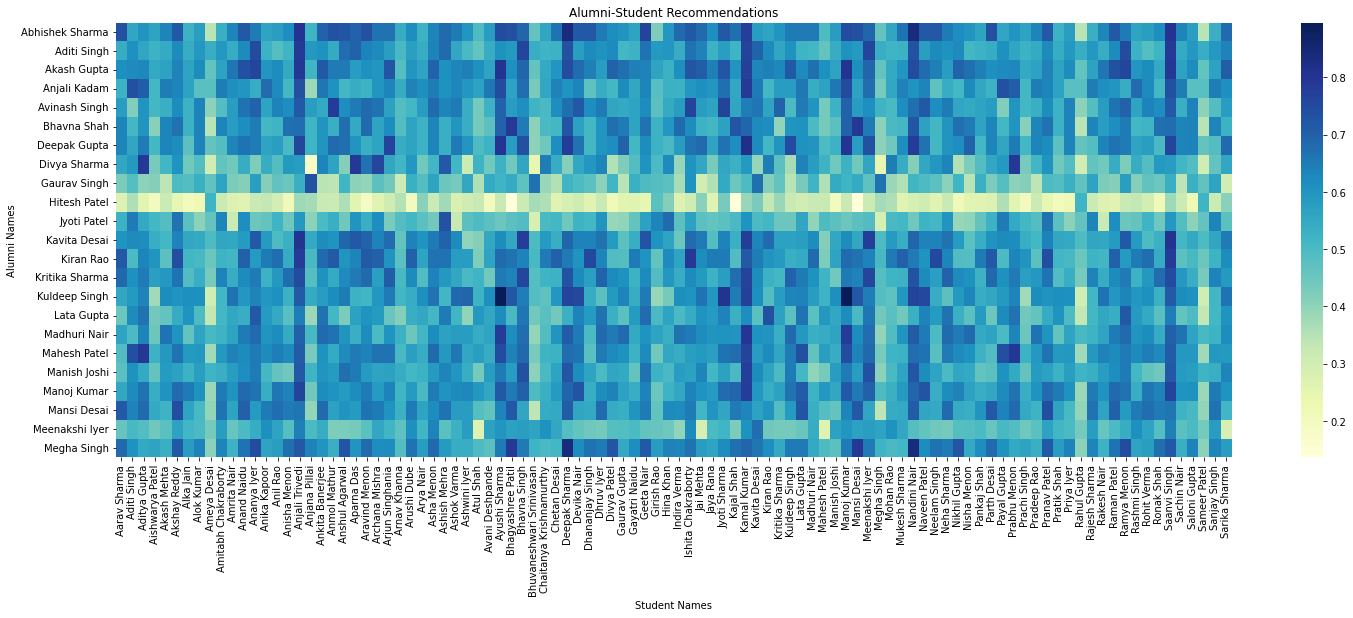

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

student_names = list(student_df['Name']) 
alumni_names = list(alumni_df['Name'])

fig, ax = plt.subplots(figsize=(25, 8))  # Adjust the figsize as needed

# Plot the heatmap
sns.heatmap(cosine_sim, xticklabels=student_names, yticklabels=alumni_names, cmap="YlGnBu")

# Set the plot title and axis labels
plt.title("Alumni-Student Recommendations")
plt.xlabel("Student Names")
plt.ylabel("Alumni Names")



# Show the plot
plt.show()


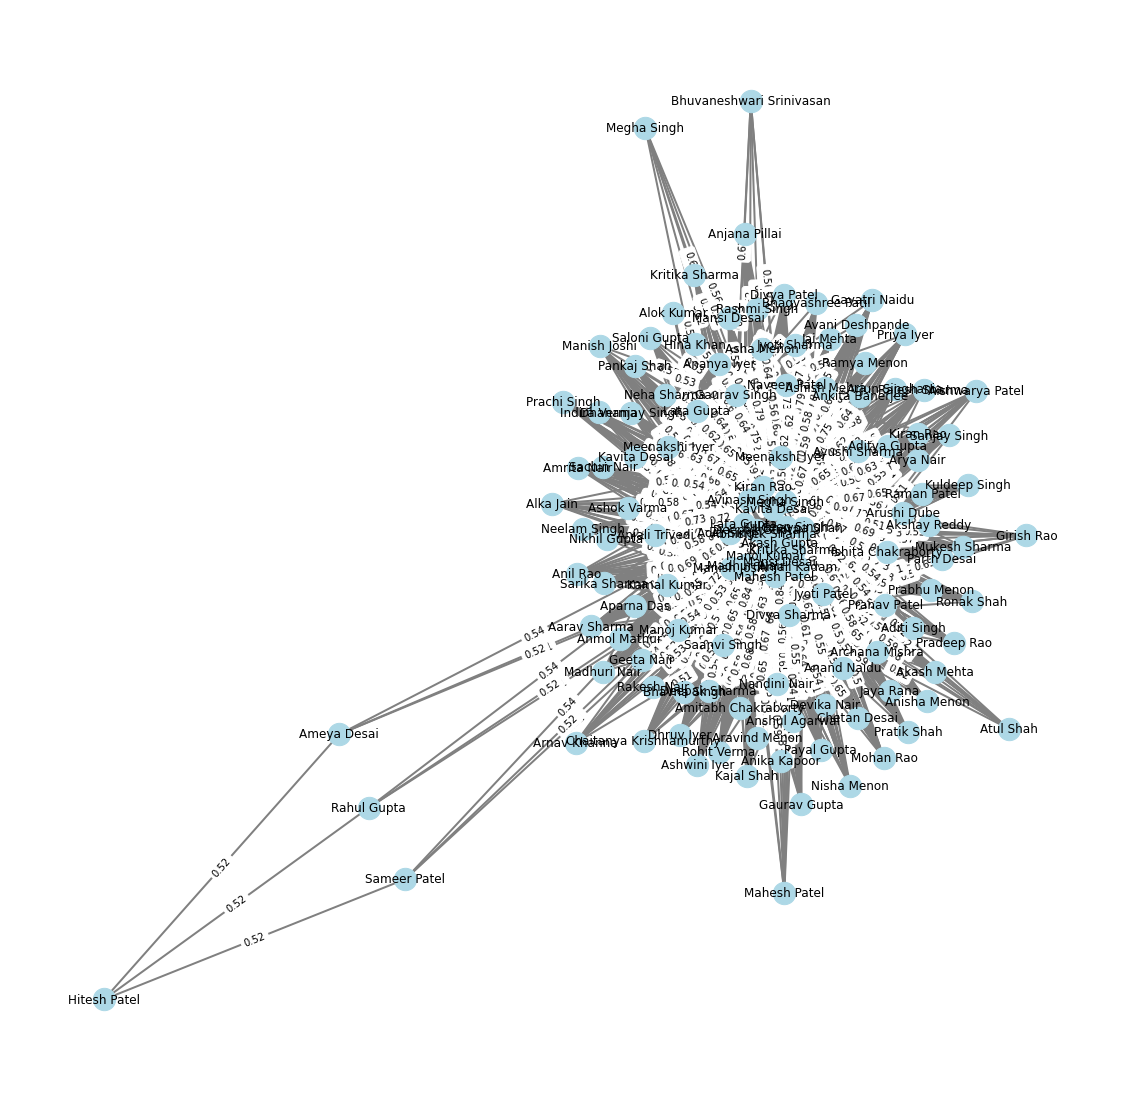

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph object
G = nx.Graph()

# Set figure size
plt.figure(figsize=(20,20))

# Add nodes for alumni and students
for name in alumni_names:
    G.add_node(f"A-{name}")
for name in student_names:
    G.add_node(f"S-{name}")

# Add edges based on cosine similarity values
for i, alumni_name in enumerate(alumni_names):
    for j, student_name in enumerate(student_names):
        sim = cosine_sim[i, j]
        if sim >= 0.5:  # set threshold for similarity
            G.add_edge(f"A-{alumni_name}", f"S-{student_name}", weight=sim)

# Define positions for nodes using spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)

# Add node labels
node_labels = {node: node.split('-')[1] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_family='sans-serif')

# Add edge labels (similarity values)
edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='sans-serif')

# Show plot
plt.axis('off')
plt.show()
